# Notebook pour répondre aux questions de la partie 2

In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('../data/train.csv')

### a. Which department made the highest turnover in 2016?

In [3]:
df_train.columns

Index(['day_id', 'but_num_business_unit', 'dpt_num_department', 'turnover'], dtype='object')

In [4]:
df_train['day_id'] = pd.to_datetime(df_train['day_id'], format='%Y-%m-%d')
df_train['year'] = df_train['day_id'].dt.year
df_train['month'] = df_train['day_id'].dt.month
df_train['day'] = df_train['day_id'].dt.day

In [5]:
df_train_2016 = df_train[df_train['year'] == 2016]
df_train_2016.groupby('dpt_num_department')['turnover'].sum().idxmax()

127

It is department num 127 that made the highest turnover in 2016

<Axes: xlabel='dpt_num_department'>

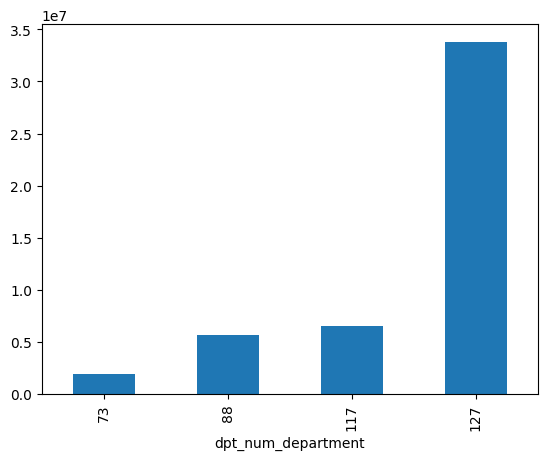

In [6]:
df_train_2016.groupby('dpt_num_department')['turnover'].sum().plot(kind='bar')

### b. What are the top 5 week numbers (1 to 53) for department 88 in 2015 in terms of turnover over all stores?

In [7]:
df_dep_88_2015 = df_train[(df_train['dpt_num_department'] == 88) & (df_train['year'] == 2015)]

In [8]:
df_dep_88_2015['week_num'] = df_dep_88_2015['day_id'].dt.isocalendar().week

/var/folders/kd/wfb_h4cs1plf9qj53qbq0g6w0000gn/T/ipykernel_64214/3104006160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dep_88_2015['week_num'] = df_dep_88_2015['day_id'].dt.isocalendar().week


In [9]:
df_dep_88_2015[df_dep_88_2015['month']==12].day_id.value_counts()

day_id
2015-12-26    277
2015-12-19    277
2015-12-12    277
2015-12-05    277
Name: count, dtype: int64

NB pas de semaine 53 dans les data

In [10]:
df_dep_88_2015.groupby('week_num')['turnover'].sum().sort_values(ascending=False)[:5]

week_num
27    141679.864768
37    139674.400588
36    137825.642436
38    137232.460861
28    125835.541415
Name: turnover, dtype: float64

<Axes: xlabel='week_num'>

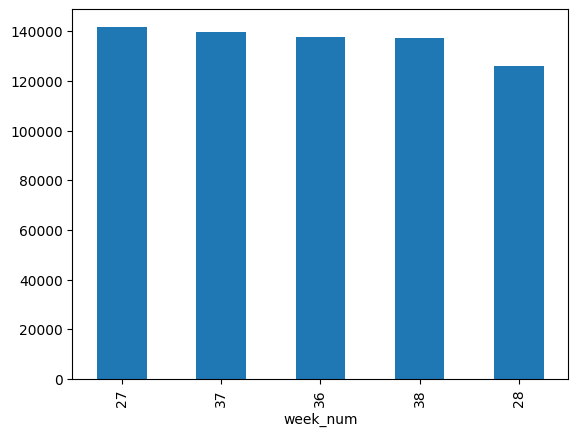

In [11]:
df_dep_88_2015.groupby('week_num')['turnover'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

Les meilleurs semaines en terme de turnover du département 88 en 2016 sont les semaines 27, 37, 36, 38 et 28.  
Soit les 2 premières semaines de juillet et les 3 premières semaine de septembre (la rentrée).

### c. What was the top performer store in 2014?

In [12]:
df_2014 = df_train[df_train['year'] == 2014]

In [13]:
df_2014.groupby('but_num_business_unit')['turnover'].sum().idxmax()

121

In [14]:
df_bu_feat = pd.read_csv('../data/bu_feat.csv')

In [15]:
df_bu_feat.columns

Index(['but_num_business_unit', 'but_postcode', 'but_latitude',
       'but_longitude', 'but_region_idr_region', 'zod_idr_zone_dgr'],
      dtype='object')

In [16]:
len(df_bu_feat.but_num_business_unit.unique())

326

In [17]:
df_bu_feat[df_bu_feat['but_num_business_unit'] == 121]

,but_num_business_unit,but_postcode,but_latitude,but_longitude,but_region_idr_region,zod_idr_zone_dgr
45,121,69500,45.725769,4.9282,8,4


Après vérification sur une carte (cf notebook exploration) et des bu_features, "but_num_business_unit" semble bien être l'identification unique pour un magasin. Donc en 2014, le magasin avec la meilleure performance est le numéro 121 soit le décathlon Bron Saint Exupery au sud-est de Lyon.

### d. Based on sales can you guess what kind of sport represents departement 73?

In [18]:
df_73 = df_train[df_train['dpt_num_department'] == 73]

<Axes: xlabel='day_id'>

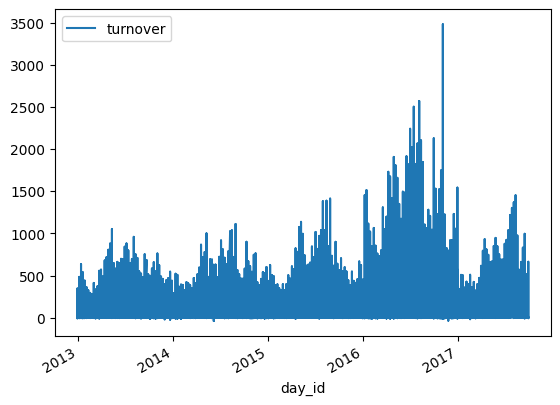

In [19]:
df_73.plot(x='day_id', y='turnover')

year
2012    Axes(0.125,0.2;0.775x0.68)
2013    Axes(0.125,0.2;0.775x0.68)
2014    Axes(0.125,0.2;0.775x0.68)
2015    Axes(0.125,0.2;0.775x0.68)
2016    Axes(0.125,0.2;0.775x0.68)
2017    Axes(0.125,0.2;0.775x0.68)
dtype: object

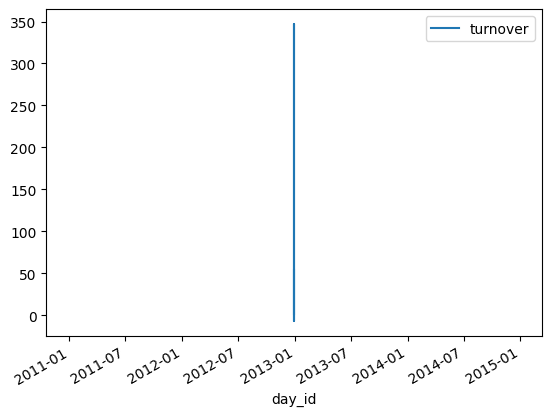

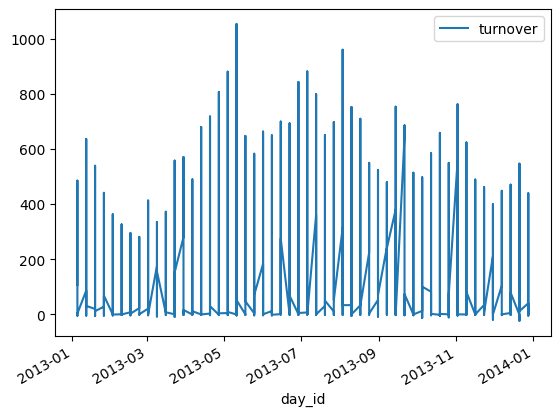

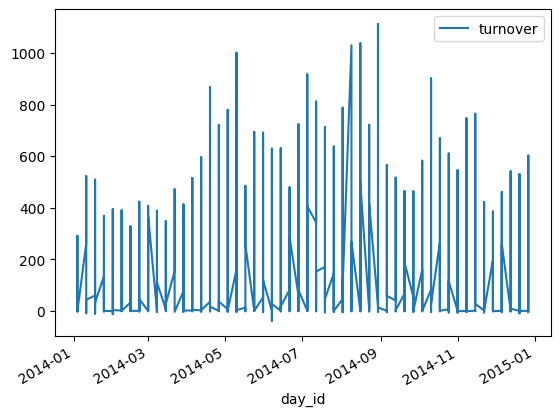

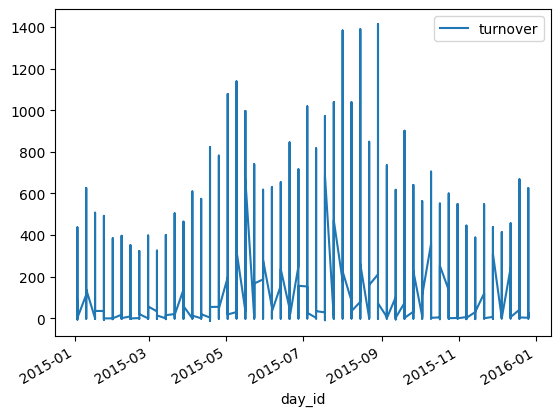

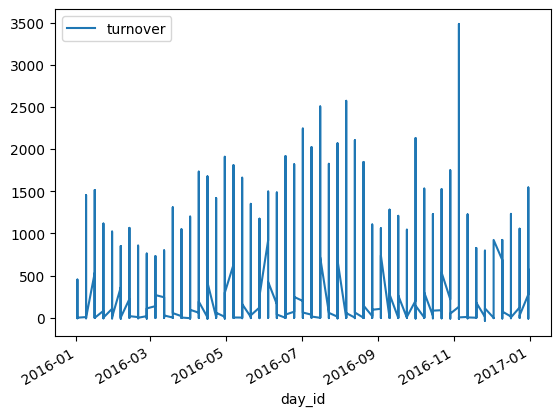

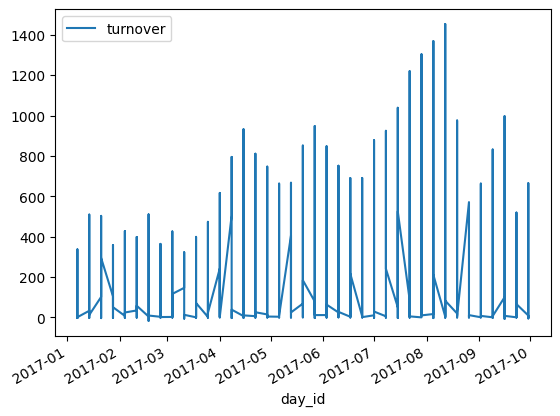

In [21]:
df_73.groupby('year').plot(x='day_id', y='turnover')

In [22]:
df_73.groupby('').plot(x='day_id', y='turnover')

In [24]:
df_73['day_of_week'] = df_73['day_id'].dt.dayofweek

/var/folders/kd/wfb_h4cs1plf9qj53qbq0g6w0000gn/T/ipykernel_64214/687003157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_73['day_of_week'] = df_73['day_id'].dt.dayofweek


<Axes: xlabel='day_of_week'>

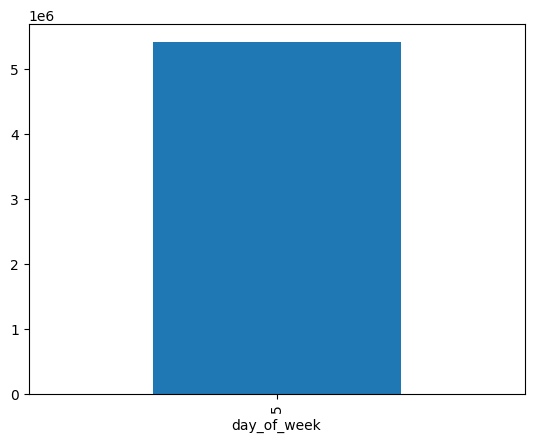

In [25]:
df_73.groupby('day_of_week')['turnover'].sum().plot(kind='bar')

In [27]:
df_73.day_id.unique()

<DatetimeArray>
['2017-09-30 00:00:00', '2017-09-23 00:00:00', '2017-09-16 00:00:00',
 '2017-09-09 00:00:00', '2017-09-02 00:00:00', '2017-08-26 00:00:00',
 '2017-08-19 00:00:00', '2017-08-12 00:00:00', '2017-08-05 00:00:00',
 '2017-07-29 00:00:00',
 ...
 '2013-03-02 00:00:00', '2013-02-23 00:00:00', '2013-02-16 00:00:00',
 '2013-02-09 00:00:00', '2013-02-02 00:00:00', '2013-01-26 00:00:00',
 '2013-01-19 00:00:00', '2013-01-12 00:00:00', '2013-01-05 00:00:00',
 '2012-12-29 00:00:00']
Length: 249, dtype: datetime64[ns]

In [28]:
df_train['day_of_week'] = df_train['day_id'].dt.dayofweek

In [30]:
df_train['day_of_week'].value_counts()

day_of_week
5    277719
Name: count, dtype: int64

Il semble que l'on ai que des données de vente sur les samedi, j'ai cru qu'il s'agissait d'une piste pour deviner le sport en question mais c'est une impasse. Il s'agit surement du jour où les données de vente de la semaine sont remontées/loggées.

On observe que l'année 2016 est environ 2x meilleur que les autres. Il s'agit d'une année olympique et d'euro de football ce qui pourrait m'orienter dans cette direction.

In [ ]:
df_73